# 作業一
* 實作只接受 Get 發送的 Request，帶入參數 name，將其值回傳。

In [6]:
# 引用需要的套件, 若有多個套件要引用，可使用逗號隔開
from flask import Flask, request

app = Flask(__name__)

# 設定網址路由，及接受的 method(預設是 GET)
@app.route('/', methods=['GET'])
def index():
    name = request.args.get('name') # 取得 name 參數
    return f"Hello , my name is {name}"
    

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [04/Jan/2022 14:15:21] "GET /?name=Eddy HTTP/1.1" 200 -
127.0.0.1 - - [04/Jan/2022 14:15:39] "GET / HTTP/1.1" 200 -


In [2]:
from IPython.display import Image

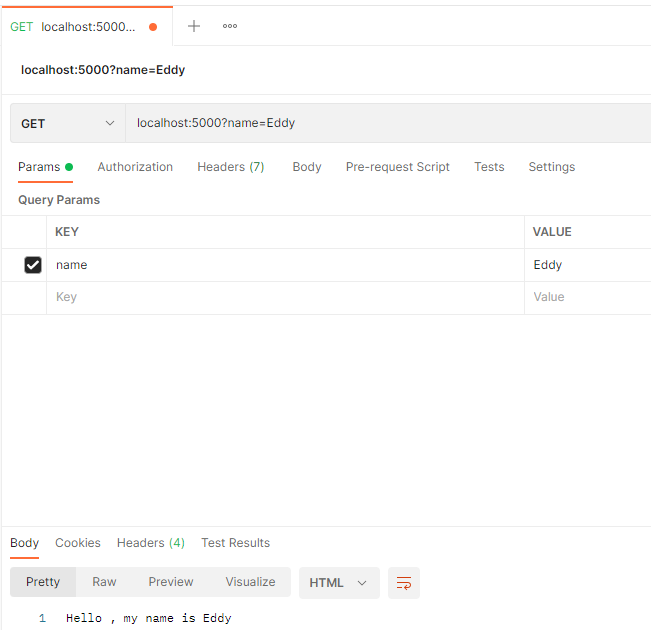

In [9]:
Image("./file/HW1.png",width=600,height=500)

# 作業二
* 實作只接受 Post 發送的 Request，帶入參數 name，將其值回傳。

In [10]:
# 引用需要的套件, 若有多個套件要引用，可使用逗號隔開
from flask import Flask, request

app = Flask(__name__)

# 設定網址路由，及接受的 method(預設是 GET)
@app.route('/', methods=['POST'])
def index():
    name = request.form.get('name') # 取得 name 參數
    passwd = request.form.get('passwd') # 取得 passwd 參數
    return "Your name: " + name + ", Your passwd: " + passwd
    

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [04/Jan/2022 14:19:08] "POST / HTTP/1.1" 200 -


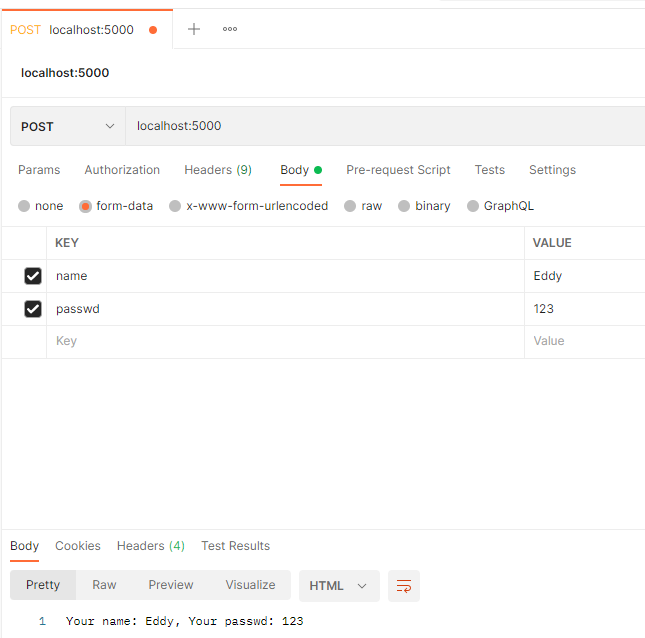

In [11]:
Image("./file/HW2.png",width=600,height=500)

# 作業三
* 使用 Post 實作檔案上傳功能，並有一個簡單的畫面可以操作檔案上傳的動作。

In [15]:
# 引用需要的套件, 若有多個套件要引用，可使用逗號隔開
import os
from flask import Flask, request, redirect, url_for, send_from_directory

app = Flask(__name__)
app.config['UPLOAD_FOLDER'] = './file/' # 檔案上傳後要放置的位置，請自行修改



# 若使用 Post 方法呼叫此 api，才會真的執行檔案上傳
# 否則若用 Get，則會回傳下面那串 html 畫面
@app.route('/', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST': 
        file = request.files['file']
        if file:
            filename = file.filename
            file.save(os.path.join(app.config['UPLOAD_FOLDER'], 
                                   filename))
            return redirect(url_for('uploaded_file',
                                    filename=filename))
    return '''
    <!doctype html>
    <title>Upload new File</title>
    <h1>Upload new File</h1>
    <form action="" method=post enctype=multipart/form-data>
      <p><input type=file name=file>
         <input type=submit value=Upload>
    </form>
    '''

@app.route('/<filename>')
def uploaded_file(filename):
    return send_from_directory(app.config['UPLOAD_FOLDER'], # 上傳成功之後，馬上讀出來並回傳到網頁上
                               filename)


if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [04/Jan/2022 16:11:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Jan/2022 16:12:04] "POST / HTTP/1.1" 302 -
127.0.0.1 - - [04/Jan/2022 16:12:04] "GET /QQ.jpg HTTP/1.1" 200 -


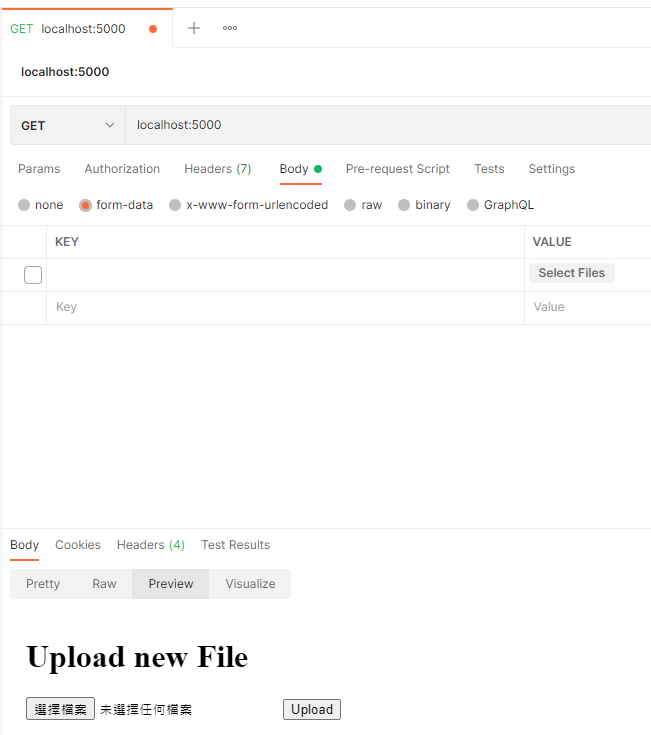

In [16]:
Image("./file/HW3.png",width=600,height=500)